# Machine Learning Assignment #

## Thêm và xử lý dữ liệu huấn luyện, dữ liệu kiểm thử ##

### Load các file dữ liệu cần thiết, đưa về dataframe và loại bỏ các cột không có thay đổi quá nhiều để tránh Data Leakage ###

In [57]:
import pandas as pd
import pickle as pickle

# Load the datasets
with open('train_set.pkl', 'rb') as file:
    train = pickle.load(file)
with open('test_set.pkl', 'rb') as file:
    test = pickle.load(file)
# Merge the list of DataFrames into one large DataFrame
train_set = pd.concat(train, ignore_index=True)
test_set = pd.concat(test, ignore_index=True)

#load ppi_data
ppi_data = pd.read_csv('previous_season_ppi.csv')
train_set = train_set.drop_duplicates(subset=['GAME_ID', 'SCORE_1', 'SCORE_2'], keep='first')
test_set = test_set.drop_duplicates(subset=['GAME_ID', 'SCORE_1', 'SCORE_2'], keep='first')
# Check the first few rows of each dataset
print(train_set.head())
print(test_set.head())
print(ppi_data.head())

     GAME_ID  SCOREMARGIN  TIME_REMAINING  PERIOD TEAM_1 TEAM_2  \
0   22400025            0               0       1    OKC    SAS   
2   22400025           -2              25       1    OKC    SAS   
3   22400025            1              35       1    OKC    SAS   
4   22400025           -2              48       1    OKC    SAS   
21  22400025            0             172       1    OKC    SAS   

       PLAYER_1.1     PLAYER_1.2      PLAYER_1.3     PLAYER_1.4  \
0   Luguentz Dort  Aaron Wiggins  Jalen Williams  Cason Wallace   
2   Luguentz Dort  Aaron Wiggins  Jalen Williams  Cason Wallace   
3   Luguentz Dort  Aaron Wiggins  Jalen Williams  Cason Wallace   
4   Luguentz Dort  Aaron Wiggins  Jalen Williams  Cason Wallace   
21  Luguentz Dort  Aaron Wiggins  Jalen Williams  Cason Wallace   

                 PLAYER_1.5         PLAYER_2.1       PLAYER_2.2    PLAYER_2.3  \
0   Shai Gilgeous-Alexander  Julian Champagnie  Harrison Barnes  Zach Collins   
2   Shai Gilgeous-Alexander  Jul

### Tạo từ điển để lấy rating từ tên cầu thủ ###

In [58]:
# Assuming 'Player Name' and 'Player Rating' are the relevant columns in ppi_data
player_rating_map = dict(zip(ppi_data['Player'], ppi_data['PPI']))


### Dùng từ điển để thay thế dữ liệu các cột player từ tên người chơi thành rating của người chơi ###

In [59]:
# Identify player columns in train_set
player_columns = [col for col in train_set.columns if 'PLAYER' in col]

# Replace player names with ratings
for col in player_columns:
    train_set[col] = train_set[col].map(player_rating_map)
    
# Identify player columns in test_set
player_columns = [col for col in test_set.columns if 'PLAYER' in col]

# Replace player names with ratings
for col in player_columns:
    test_set[col] = test_set[col].map(player_rating_map)


### Điền dữ liệu rating còn thiếu của các cầu thủ không có dữ liệu ###

In [60]:
# Replace missing ratings with a default value, e.g., 0
train_set[player_columns] = train_set[player_columns].fillna(0.75)
train_set.head()
# Replace missing ratings with a default value, e.g., 0
test_set[player_columns] = test_set[player_columns].fillna(0.75)
test_set.head()

,GAME_ID,SCOREMARGIN,TIME_REMAINING,PERIOD,TEAM_1,TEAM_2,PLAYER_1.1,PLAYER_1.2,PLAYER_1.3,PLAYER_1.4,PLAYER_1.5,PLAYER_2.1,PLAYER_2.2,PLAYER_2.3,PLAYER_2.4,PLAYER_2.5,SCORE_1,SCORE_2,WINNER
0,22400243,0,0,1,UTA,LAC,0.75,0.75,1.369643,1.52406,1.090741,1.158779,0.925532,1.246591,0.973545,1.390087,0,0,LAC
3,22400243,-2,31,1,UTA,LAC,0.75,0.75,1.369643,1.52406,1.090741,1.158779,0.925532,1.246591,0.973545,1.390087,0,2,LAC
6,22400243,-4,57,1,UTA,LAC,0.75,0.75,1.369643,1.52406,1.090741,1.158779,0.925532,1.246591,0.973545,1.390087,0,4,LAC
8,22400243,-7,82,1,UTA,LAC,0.75,0.75,1.369643,1.52406,1.090741,1.158779,0.925532,1.246591,0.973545,1.390087,0,7,LAC
10,22400243,-10,99,1,UTA,LAC,0.75,0.75,1.369643,1.52406,1.090741,1.158779,0.925532,1.246591,0.973545,1.390087,0,10,LAC


### Thêm cột TARGET cho mô hình bằng cách so sánh các chuỗi ###

In [61]:
# Add a new column to indicate whether TEAM_1 is the winner
train_set['TEAM_1_WIN'] = (train_set['WINNER'] == train_set['TEAM_1']).astype(int)
test_set['TEAM_1_WIN'] = (test_set['WINNER'] == test_set['TEAM_1']).astype(int)

### Chuyển các cột WINNER, TEAM_1, TEAM_2 về dạng chuỗi ###

In [62]:
# Change the data types of WINNER, TEAM_1, and TEAM_2 to string
columns_to_convert = ['WINNER', 'TEAM_1', 'TEAM_2']
train_set[columns_to_convert] = train_set[columns_to_convert].astype(str)
test_set[columns_to_convert] = test_set[columns_to_convert].astype(str)
print(train_set.dtypes)

GAME_ID             int64
SCOREMARGIN         int64
TIME_REMAINING      int64
PERIOD              int64
TEAM_1             object
TEAM_2             object
PLAYER_1.1        float64
PLAYER_1.2        float64
PLAYER_1.3        float64
PLAYER_1.4        float64
PLAYER_1.5        float64
PLAYER_2.1        float64
PLAYER_2.2        float64
PLAYER_2.3        float64
PLAYER_2.4        float64
PLAYER_2.5        float64
SCORE_1             int64
SCORE_2             int64
WINNER             object
TEAM_1_WIN          int32
dtype: object


### Sắp xếp rating của người chơi trong 1 đội từ cao đến thấp để đảm bảo có thể tìm thấy các quy luật ẩn ###

In [63]:
# Sort the player ratings for PLAYER_1 and PLAYER_2 in each row (from highest to lowest)
train_set[['PLAYER_1.1', 'PLAYER_1.2', 'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5']] = train_set[['PLAYER_1.1', 'PLAYER_1.2', 'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5']].apply(lambda x: pd.Series(sorted(x, reverse=True)), axis=1)
train_set[['PLAYER_2.1', 'PLAYER_2.2', 'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5']] = train_set[['PLAYER_2.1', 'PLAYER_2.2', 'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5']].apply(lambda x: pd.Series(sorted(x, reverse=True)), axis=1)

test_set[['PLAYER_1.1', 'PLAYER_1.2', 'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5']] = test_set[['PLAYER_1.1', 'PLAYER_1.2', 'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5']].apply(lambda x: pd.Series(sorted(x, reverse=True)), axis=1)
test_set[['PLAYER_2.1', 'PLAYER_2.2', 'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5']] = test_set[['PLAYER_2.1', 'PLAYER_2.2', 'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5']].apply(lambda x: pd.Series(sorted(x, reverse=True)), axis=1)

# Show the updated DataFrame
print(train_set.head())

     GAME_ID  SCOREMARGIN  TIME_REMAINING  PERIOD TEAM_1 TEAM_2  PLAYER_1.1  \
0   22400025            0               0       1    OKC    SAS    1.994118   
2   22400025           -2              25       1    OKC    SAS    1.994118   
3   22400025            1              35       1    OKC    SAS    1.994118   
4   22400025           -2              48       1    OKC    SAS    1.994118   
21  22400025            0             172       1    OKC    SAS    1.994118   

    PLAYER_1.2  PLAYER_1.3  PLAYER_1.4  PLAYER_1.5  PLAYER_2.1  PLAYER_2.2  \
0     1.400958    1.101274     0.97993    0.929612    1.282353    1.136742   
2     1.400958    1.101274     0.97993    0.929612    1.282353    1.136742   
3     1.400958    1.101274     0.97993    0.929612    1.282353    1.136742   
4     1.400958    1.101274     0.97993    0.929612    1.282353    1.136742   
21    1.400958    1.101274     0.97993    0.929612    1.282353    1.136742   

    PLAYER_2.3  PLAYER_2.4  PLAYER_2.5  SCORE_1  SCORE_2

### Chuẩn bị các thư viện và chia dữ liệu huấn luyện, kiểm thử ra các tập để huấn luyện và kiểm thư riêng ###

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Load features and target
X_train = train_set.drop(columns=["TEAM_1_WIN", "WINNER", "GAME_ID"])  # Replace "TARGET" with your target column name
y_train = train_set["TEAM_1_WIN"]

X_test = test_set.drop(columns=["TEAM_1_WIN", "WINNER", "GAME_ID"])  # Replace "TARGET" with your target column name
y_test = test_set["TEAM_1_WIN"]


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Aggregated Random Search Results:
   subsample  reg_lambda  reg_alpha  n_estimators  max_depth  learning_rate  \
0        0.7          10         10           200          3          0.010   
1        0.7           1          0          1400          3          0.001   
2        0.8           0         10           800          6          0.001   

   colsample_bytree  
0               1.0  
1               1.0  
2               0.7  


### Tách các thuộc tính của dữ liệu thành numerical và categorical ###

In [ ]:
# Preprocessing
numerical_cols = [
    'SCOREMARGIN', 'TIME_REMAINING', 'PERIOD', 'PLAYER_1.1', 'PLAYER_1.2', 
    'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5', 'PLAYER_2.1', 'PLAYER_2.2', 
    'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5'  # Numerical feature names
]
categorical_cols = ["TEAM_1", "TEAM_2"]

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [ ]:
# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10, 20],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 1, 10],
    'reg_lambda': [0, 1, 10]
}

## Triển khai mô hình XGBoost với hàm mất mát là hàm Logistic ##

### Khởi tạo mô hình và triển khai random_search để tìm các bộ hyperparameters có tiềm năng ###

In [ ]:

# Initialize XGBoost model
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

# Run RandomizedSearchCV three times with different random seeds
random_search_results = []
for i in range(3):
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring="accuracy",
        cv=3,
        n_jobs=-1,
        verbose=1,
        n_iter=50,
        random_state=i
    )
    random_search.fit(X_train, y_train)
    random_search_results.append(random_search.best_params_)

# Aggregate the best parameters from all random searches
aggregated_results = pd.DataFrame(random_search_results)
print("Aggregated Random Search Results:")
print(aggregated_results)



### Từ các bộ Hyperparameter tiềm năng, ta dùng gridsearch để tìm xem bộ Hyperparameter nào là tối ưu nhất ###

In [ ]:
# Now run GridSearchCV based on the best parameters from the random search results
# Define the grid of hyperparameters to fine-tune further
best_params = aggregated_results.mode().iloc[0]  # Use the mode (most frequent values) from the random searches

param_grid = {
    'n_estimators': [int(best_params['n_estimators'] - 100), 
                      int(best_params['n_estimators']), 
                      int(best_params['n_estimators'] + 100)],
    'learning_rate': [max(best_params['learning_rate'] - 0.01, 0.01), 
                      best_params['learning_rate'], 
                      best_params['learning_rate'] + 0.01],
    'max_depth': [max(int(best_params['max_depth'] - 1), 1), 
                  int(best_params['max_depth']), 
                  int(best_params['max_depth'] + 1)],
    'subsample': [max(best_params['subsample'] - 0.1, 0.1), 
                  best_params['subsample'], 
                  min(best_params['subsample'] + 0.1, 1)],
    'colsample_bytree': [min(max(best_params['colsample_bytree'] - 0.1, 0.1), 1), 
                         best_params['colsample_bytree'], 
                         min(best_params['colsample_bytree'] + 0.1, 1)],
    'reg_alpha': [max(int(best_params['reg_alpha'] - 1), 0), 
                  int(best_params['reg_alpha']), 
                  int(best_params['reg_alpha'] + 1)],
    'reg_lambda': [max(int(best_params['reg_lambda'] - 1), 0), 
                   int(best_params['reg_lambda']), 
                   int(best_params['reg_lambda'] + 1)]
}



# Run GridSearchCV with the fine-tuned grid
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters after Grid Search
print(f"Best Parameters from Grid Search: {grid_search.best_params_}")

# Set the best parameters to the model
model = grid_search.best_estimator_

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters from Grid Search: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 0, 'subsample': 0.6}


### Huyến luyện và kiểm thử mô hình bằng các bộ dữ liệu đã được xử lý cũng như các chỉ số như Cross-Validation Accuracy, Accuracy, Error rate, ROC-AUC. Đánh giá và đưa ra giả định về mô hình. ###

Cross-Validation Accuracy Scores: [0.79028545 0.73802947 0.77440147 0.68600368 0.68024862]
Mean Cross-Validation Accuracy: 0.7337937384898712
Training Accuracy: 0.7893
Training Error Rate (E_train): 0.2107
Testing Accuracy: 0.7397
Testing Error Rate (E_test): 0.2603
Training ROC-AUC Score: 0.8613
Testing ROC-AUC Score: 0.8165
Training Error Rate (E_total): 0.2355
    Actual  Predicted   WinRate
0        0          0  0.279775
2        0          0  0.267201
3        0          0  0.293639
4        0          0  0.267201
21       0          0  0.279775
    Actual  Predicted   WinRate
0        0          0  0.298181
3        0          0  0.270139
6        0          0  0.253460
8        0          0  0.239842
10       0          0  0.191682


<Figure size 1000x800 with 0 Axes>

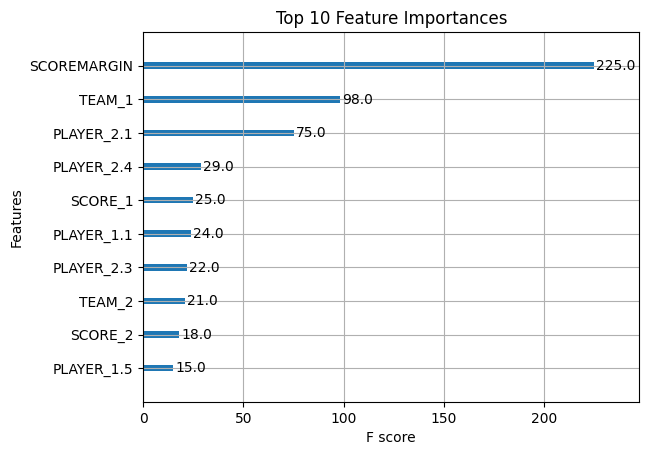

In [ ]:


# Cross-validation scores
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

# Predictions and Evaluation on both Train and Test data
y_train_pred = model.predict(X_train)  # Training predictions
y_train_pred_proba = model.predict_proba(X_train)[:, 1]  # Probability of "1" (win rate)

y_test_pred = model.predict(X_test)  # Test predictions
y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of "1" (win rate)

# Calculate Accuracy and Error Rates
accuracy_train = accuracy_score(y_train, y_train_pred)
error_train_rate = 1 - accuracy_train

accuracy_test = accuracy_score(y_test, y_test_pred)
error_test_rate = 1 - accuracy_test

# Calculate ROC-AUC Score
auc_train_score = roc_auc_score(y_train, y_train_pred_proba)
auc_test_score = roc_auc_score(y_test, y_test_pred_proba)

# Print results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Error Rate (E_train): {error_train_rate:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Error Rate (E_test): {error_test_rate:.4f}")
print(f"Training ROC-AUC Score: {auc_train_score:.4f}")
print(f"Testing ROC-AUC Score: {auc_test_score:.4f}")
print(f"Training Error Rate (E_total): {(error_train_rate + error_test_rate)/2 :.4f}")
# Visualization
# 1. Plot predictions vs actual for both Train and Test data
train_results = pd.DataFrame({
    "Actual": y_train,
    "Predicted": y_train_pred,
    "WinRate": y_train_pred_proba  # Probability of positive class
})
test_results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_test_pred,
    "WinRate": y_test_pred_proba  # Probability of positive class
})

print(train_results.head())
print(test_results.head())
# Save results for analysis
train_results.to_csv("Logistic_train_predictions_with_error_rate.csv", index=False)
test_results.to_csv("Logistic_test_predictions_with_error_rate.csv", index=False)

# 2. Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type="weight", max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


### Lưu trữ mô hình ###

In [ ]:
model.save_model('model_logistic.json')  # Save as JSON
model.save_model('model_logistic.bin')   # Save as binary

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


## Triển khai mô hình XGBoost với hàm mất mát là hàm Hinge ##

### Khởi tạo mô hình và triển khai random_search để tìm các bộ hyperparameters có tiềm năng ###

In [ ]:
# Initialize XGBoost model with hinge loss
model = xgb.XGBClassifier(
    objective="binary:hinge",  # Change objective to hinge
    eval_metric="logloss",     # You can still use logloss for evaluation
    random_state=42
)

# Run RandomizedSearchCV three times with different random seeds
random_search_results = []
for i in range(3):
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring="accuracy",
        cv=3,
        n_jobs=-1,
        verbose=1,
        n_iter=50,
        random_state=i
    )
    random_search.fit(X_train, y_train)
    random_search_results.append(random_search.best_params_)

# Aggregate the best parameters from all random searches
aggregated_results = pd.DataFrame(random_search_results)
print("Aggregated Random Search Results:")
print(aggregated_results)

### Từ các bộ Hyperparameter tiềm năng, ta dùng gridsearch để tìm xem bộ Hyperparameter nào là tối ưu nhất ###

In [ ]:
# Now run GridSearchCV based on the best parameters from the random search results
# Define the grid of hyperparameters to fine-tune further
best_params = aggregated_results.mode().iloc[0]  # Use the mode (most frequent values) from the random searches

param_grid = {
    'n_estimators': [int(best_params['n_estimators'] - 100), 
                      int(best_params['n_estimators']), 
                      int(best_params['n_estimators'] + 100)],
    'learning_rate': [max(best_params['learning_rate'] - 0.01, 0.01), 
                      best_params['learning_rate'], 
                      best_params['learning_rate'] + 0.01],
    'max_depth': [max(int(best_params['max_depth'] - 1), 1), 
                  int(best_params['max_depth']), 
                  int(best_params['max_depth'] + 1)],
    'subsample': [max(best_params['subsample'] - 0.1, 0.1), 
                  best_params['subsample'], 
                  min(best_params['subsample'] + 0.1, 1)],
    'colsample_bytree': [min(max(best_params['colsample_bytree'] - 0.1, 0.1), 1), 
                         best_params['colsample_bytree'], 
                         min(best_params['colsample_bytree'] + 0.1, 1)],
    'reg_alpha': [max(int(best_params['reg_alpha'] - 1), 0), 
                  int(best_params['reg_alpha']), 
                  int(best_params['reg_alpha'] + 1)],
    'reg_lambda': [max(int(best_params['reg_lambda'] - 1), 0), 
                   int(best_params['reg_lambda']), 
                   int(best_params['reg_lambda'] + 1)]
}

# Run GridSearchCV with the fine-tuned grid
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters after Grid Search
print(f"Best Parameters from Grid Search: {grid_search.best_params_}")

# Set the best parameters to the model
model = grid_search.best_estimator_

### Huyến luyện và kiểm thử mô hình bằng các bộ dữ liệu đã được xử lý cũng như các chỉ số như Cross-Validation Accuracy, Accuracy, Error rate, ROC-AUC. Đánh giá và đưa ra giả định về mô hình. ###

In [ ]:
# Cross-validation scores
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

# Predictions and Evaluation on both Train and Test data
y_train_pred = model.predict(X_train)  # Training predictions
y_test_pred = model.predict(X_test)  # Test predictions

# Calculate Accuracy and Error Rates
accuracy_train = accuracy_score(y_train, y_train_pred)
error_train_rate = 1 - accuracy_train

accuracy_test = accuracy_score(y_test, y_test_pred)
error_test_rate = 1 - accuracy_test

# Calculate ROC-AUC Score
auc_train_score = roc_auc_score(y_train, y_train_pred)
auc_test_score = roc_auc_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Error Rate (E_train): {error_train_rate:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Error Rate (E_test): {error_test_rate:.4f}")
print(f"Training ROC-AUC Score: {auc_train_score:.4f}")
print(f"Testing ROC-AUC Score: {auc_test_score:.4f}")
print(f"Training Error Rate (E_total): {(error_train_rate + error_test_rate)/2 :.4f}")

# Visualization
# 1. Plot predictions vs actual for both Train and Test data
train_results = pd.DataFrame({
    "Actual": y_train,
    "Predicted": y_train_pred,
    "WinRate": y_train_pred  # Direct class predictions (hinge loss)
})
test_results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_test_pred,
    "WinRate": y_test_pred  # Direct class predictions (hinge loss)
})

print(train_results.head())
print(test_results.head())

# Save results for analysis
train_results.to_csv("Hinge_train_predictions_with_error_rate.csv", index=False)
test_results.to_csv("Hinge_test_predictions_with_error_rate.csv", index=False)

# 2. Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type="weight", max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

### Lưu trữ mô hình ###

In [ ]:
model.save_model('model_hinge.json')  # Save as JSON
model.save_model('model_hinge.bin')   # Save as binary